In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [12,8]

### Dot products

In [3]:
x = np.arange(3)
x

array([0, 1, 2])

In [4]:
y = np.arange(3,6)
y

array([3, 4, 5])

In [5]:
x*y

array([ 0,  4, 10])

The dot product is the sum of these numbers

In [6]:
np.sum(x*y)

14

In [7]:
x@y

14

### Linear classifier prediction
- raw model output = coefficients * features + intercept
- linear classifier prediction: compute raw model output, check the **sign**
    - if positive, predict one class
    - if negative, predict the other class
- This is the same for logistic regression and linear SVM

### What is a loss function
### Least squares: the squared loss
- scikit-learn's `LinearRegression` minizies loss

$\displaystyle\sum^n_{i=1}(true~\mathit{i}th~target~value~-~predicted~\mathit{i}th~target~value)^2$

- Minimization is with respect to coefficients or parameters of the model. 

- Note that in scikit-learn `model.score()` isn't necessarily the loss function. 

### Classification errors: the 0-1 loss

- Squared loss not appropriate for classification problems (more on this later) 

- A natural loss for classification problem is the number of errors

- This is the **0-1 loss**: it's 0 for a correct prediction and 1 for an incorrect prediction. 

- But this loss is hard to minimize.

### Minimize a loss
```python 


```

In [8]:
from scipy.optimize import minimize

minimize(np.square, 0).x

array([0.])

In [9]:
minimize(np.square, 2).x

array([-1.88846401e-08])

In [10]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [11]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0 
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true-y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

[-9.28959762e-02  4.87151599e-02 -4.05783960e-03  2.85398943e+00
 -2.86836008e+00  5.92814867e+00 -7.26933325e-03 -9.68510449e-01
  1.71155669e-01 -9.39659421e-03 -3.92188046e-01  1.49055106e-02
 -4.16304277e-01]


In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


### Loss function 
### The raw model output

<img src="data/zero_one_loss.png" alt="zero_one_loss" width= "500"/>

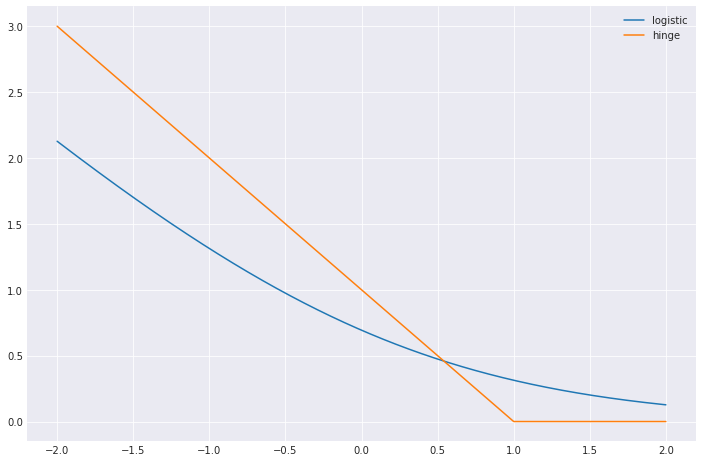

In [13]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
    return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2, 2, 1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [14]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_10 = data.data[:, :10]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X = scaler.fit_transform(X_10)
y = data.target
y[y == 0] = -1

In [15]:
from sklearn.linear_model import LogisticRegression

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0 
    for i in range(len(X)):
        raw_model_output  = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 1.03586969 -1.65378542  4.08336518 -9.40922904 -1.06786446  0.07891683
 -0.85110087 -2.44103435 -0.45285553  0.43353136]
[[ 1.03744703 -1.65335116  4.08134116 -9.40787339 -1.06764575  0.07890656
  -0.85076641 -2.44081631 -0.45277608  0.43326471]]
